In [1]:
import pandas as pd

df = pd.read_csv("projet_photo/data_x_y_rgb.csv")
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,760,761,762,763,764,765,766,767,y,pseudos
0,0,185,174,176,210,265,300,326,280,287,...,128.0,108.0,111.0,121.0,113.0,95.0,87.0,325.0,like,tim
1,1,88,65,100,293,570,1109,1261,1600,2005,...,17.0,18.0,19.0,15.0,7.0,7.0,5.0,38.0,dislike,tim
2,2,73,117,157,118,86,80,85,52,31,...,115.0,142.0,179.0,295.0,339.0,348.0,138.0,337.0,like,tim
3,3,60,23,34,42,52,53,75,86,101,...,1.0,2.0,2.0,6.0,2.0,1.0,4.0,27.0,like,tim
4,4,158,84,120,207,456,782,976,1700,1587,...,293.0,259.0,322.0,451.0,346.0,616.0,534.0,2786.0,like,tim


In [38]:
import numpy as np

Y = df["y"].values
Y = np.delete(Y, 1565, axis=0)
Y_as_int = np.empty(shape=Y.shape, dtype=int)
for i,value in enumerate(Y):
    if Y[i] == "dislike":
        Y_as_int[i] = 0
    else:
        Y_as_int[i] = 1
        
print(Y_as_int)

X = df.values[:, 1:769]
X = np.delete(X, 1565, axis=0)
Xnorm = np.empty(shape=X.shape)
skiprow = 1565
for ir, x in enumerate(X):
    if ir != skiprow:
        Xnorm[ir, :] = x/x.max()

print(Xnorm.shape)

[1 0 1 ... 1 1 1]
(3549, 768)


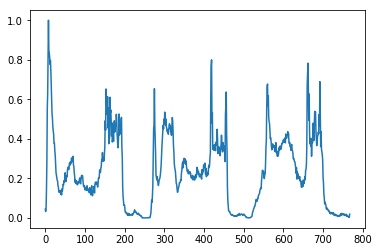

In [4]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(Xnorm[1, :])
plt.show()

train (2839, 768)
test (710, 768)
--------------------------------------------------
pipeline Naive Bayes Gaussian
start training
duration 0 secondes
ratio: 0.5422535211267606
--------------------------------------------------
pipeline Linear SVC
start training
duration 8 secondes
ratio: 0.5943661971830986
--------------------------------------------------
pipeline SVC kernel rbf
start training
duration 10 secondes
ratio: 0.6338028169014085
--------------------------------------------------
pipeline SVC kernel poly d=1
start training
duration 9 secondes
ratio: 0.6338028169014085
--------------------------------------------------
pipeline SVC kernel poly d=2
start training
duration 9 secondes
ratio: 0.6338028169014085
--------------------------------------------------
pipeline KNN
start training
duration 0 secondes
ratio: 0.6112676056338028
--------------------------------------------------
pipeline MLP
start training
duration 37 secondes
ratio: 0.5704225352112676


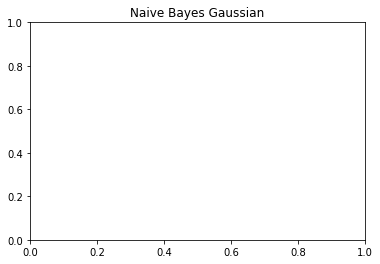

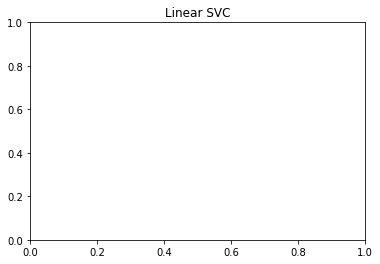

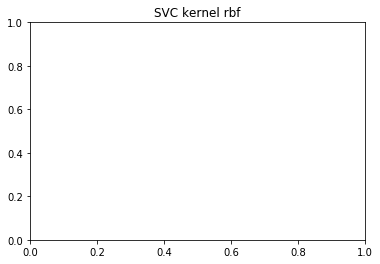

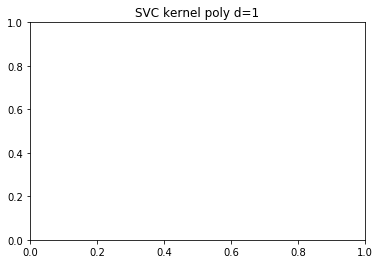

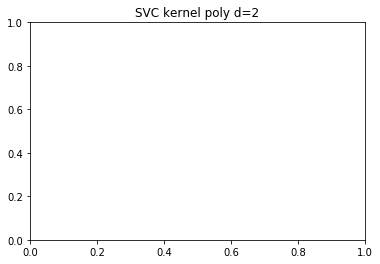

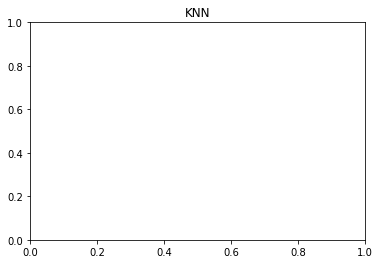

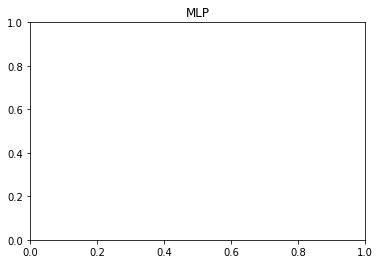

In [42]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import NuSVC, SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
import numpy as np
from datetime import datetime

from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# on test le naive bayes et les différents SVM
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#pca_2d = PCA(n_components=2)

pipelines = [
    # Pipeline([("PCA 2D", pca_2d), ("Naive Bayes Multinomial", MultinomialNB())]), 
    Pipeline([("Naive Bayes Gaussian", GaussianNB())]), 
    Pipeline([("Linear SVC", LinearSVC())]),
    Pipeline([("SVC kernel rbf", SVC(kernel="rbf"))]),
    Pipeline([("SVC kernel poly d=1", SVC(kernel="poly", degree=1))]),
    Pipeline([("SVC kernel poly d=2", SVC(kernel="poly", degree=2))]),
    Pipeline([("KNN", KNeighborsClassifier(n_neighbors=5, algorithm="kd_tree"))]),
    Pipeline([("MLP", 
            MLPClassifier(hidden_layer_sizes=(300,), 
            activation="relu", 
            solver="lbfgs", 
            verbose=True))]),
]

# on divise l'échantillon
X_train, X_test, Y_train, Y_test = train_test_split(
    Xnorm, Y_as_int, 
    shuffle=True, test_size=0.2, train_size=None)

print("train", X_train.shape)
print("test", X_test.shape)
    
for i,pipeline in enumerate(pipelines):
    print("-"*50)
    start = datetime.now()
    pipeline_name = pipeline.steps[0][0]
    print("pipeline", pipeline_name)
    print("start training")
    pipeline.fit(X_train, Y_train)
    print("duration", (datetime.now() - start).seconds, "secondes")
    # on prédit sur l'échantillon de test
    predicted = pipeline.predict(X_test)
    
    # on affiche les résultats
    # print("correct ones", np.sum(predicted == Y_test))
    # print("false ones", np.sum(predicted != Y_test))
    print("ratio:", np.mean(predicted == Y_test))
    
    # on relance le pipeline pour afficher les frontières des régions
    # la fonction plot_decision_regions à besoin des classes sous forme d'entiers
    # d'ou le Y_as_int.
    clf = pipeline.steps[0][1]
    fig = plt.figure()
    plt.title(pipeline_name)
    pipeline.fit(Xnorm, Y_as_int)
    #plot_decision_regions(X=Xnorm, y=Y_as_int, clf=clf, legend=2, X_highlight=X_test)